## Todo
* We need to process SmartDoc dataset into a format that can be used by the models. That is to have to images, one the RGB and one the mask.
* Then this can be used for training the model.

In [2]:
import pathlib
import sys
import csv
sys.path.append("../")

In [3]:
import dataprocessor

In [4]:
src = pathlib.Path("../../data-doc/SmartDocProcessed")
dst = pathlib.Path("../../data-doc/SmartDocMaskedDataset/")

In [5]:
if not dst.exists():
    dst.mkdir(parents=True)

In [6]:
dataset_loader = dataprocessor.SmartDocDirectories(str(src))

In [7]:
import numpy as np
import csv
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt

In [8]:
counter = 0
for data_elem in tqdm(dataset_loader.myData):
    img_path = data_elem[0]
    target = data_elem[1].reshape((4, 2))
    img = cv2.imread(img_path)
    break

  0%|          | 0/24889 [00:00<?, ?it/s]


In [32]:
from torchvision.utils import make_grid
from torchvision.io import read_image
import torchvision.transforms.functional as F

In [12]:
mask = np.zeros(img.shape[:2], dtype="uint8")

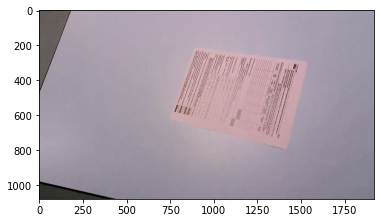

In [14]:
plt.imshow(img)

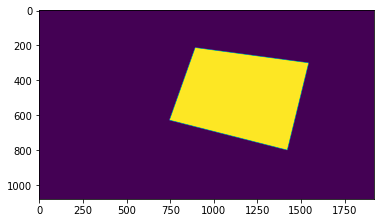

In [13]:
plt.imshow(cv2.fillPoly(mask, [target], 255))

In [ ]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

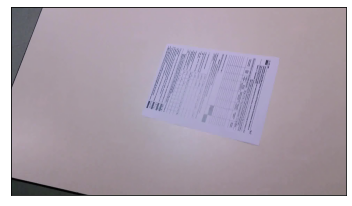

In [ ]:
grid = make_grid(read_image(img_path))
show(grid)

In [ ]:
with open(dst / "gt.csv", "a") as csvfile:
    writer = csv.writer(
        csvfile, delimiter=",", quotechar="|", quoting=csv.QUOTE_MINIMAL
    )
    counter = 0
    for data_elem in tqdm(dataset_loader.myData):
        img_path = data_elem[0]
        target = data_elem[1].reshape((4, 2))
        img = cv2.imread(img_path)


        corner_cords = target

        for angle in range(0, 1, 90):
            img_rotate, gt_rotate = utils.rotate(img, corner_cords, angle)
            for random_crop in range(0, 1):
                img_list, gt_list = utils.get_corners(img_rotate, gt_rotate)
                for a in range(0, 4):
                    counter += 1
                    f_name = f"{str(counter).zfill(8)}.jpg"
                    gt_store = list(np.array(gt_list[a]) / (300, 300))
                    img_store = cv2.resize(img_list[a], (64, 64))
                    cv2.imwrite(
                        str(dst / f_name),
                        img_store,
                        [int(cv2.IMWRITE_JPEG_QUALITY), 80],
                    )
                    writer.writerow((f_name, tuple(gt_store)))

In [ ]:
def corner_data_generator(
):



    import csv

    with open(dst / "gt.csv", "a") as csvfile:
        writer = csv.writer(
            csvfile, delimiter=",", quotechar="|", quoting=csv.QUOTE_MINIMAL
        )
        counter = 0
        for data_elem in tqdm(dataset_loader.myData):
            img_path = data_elem[0]
            target = data_elem[1].reshape((4, 2))
            img = cv2.imread(img_path)

            if dataset == DatasetType.SELFCOLLECTED:
                target = target / (img.shape[1], img.shape[0])
                target = target * (1920, 1920)
                img = cv2.resize(img, (1920, 1920))

            corner_cords = target

            for angle in range(0, 1, 90):
                img_rotate, gt_rotate = utils.rotate(img, corner_cords, angle)
                for random_crop in range(0, 1):
                    img_list, gt_list = utils.get_corners(img_rotate, gt_rotate)
                    for a in range(0, 4):
                        counter += 1
                        f_name = f"{str(counter).zfill(8)}.jpg"
                        gt_store = list(np.array(gt_list[a]) / (300, 300))
                        img_store = cv2.resize(img_list[a], (64, 64))
                        cv2.imwrite(
                            str(dst / f_name),
                            img_store,
                            [int(cv2.IMWRITE_JPEG_QUALITY), 80],
                        )
                        writer.writerow((f_name, tuple(gt_store)))